# Statement:
Lothar Collatz proposed this remarkable conjecture in 1937: "Define $C : {1, 2, 3, ...} ⟼ {1, 2, 3, ...}$ as
follows: if n is even, $C(n) = n/2$, else $C(n) = 3n + 1$. Then for any choice of n, $Ci (n) = 11$, for some i”.
For example, if we start with the number 11 and iteratively compute $Ci (11)$, we get the sequence $11,
34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1$.
Despite intense efforts, the Collatz conjecture has not been proved or disproved.

Suppose you are given the task of proving or disproving the Collatz conjecture for the first billion
integers. A direct approach would be to compute the convergence sequence for each number in this set.
How would you prove that Collatz hypothesis works for at least the first N integers? What is the
runtime of your algorithm?

<hr>

## Approaches to the problem 🤔

### Collatz Function

The Collatz function can be expressed as follows:

$$
C(n) =
\begin{cases}
n + 1, & \text{if } n\ is\ odd \\
n/2, & \text{if } n\ is\ even
\end{cases}
$$

This function is applied iteratively to generate the Collatz sequence:

1. If \( n \) is even, divide it by 2.
2. If \( n \) is odd, multiply it by 3 and add 1.

The Collatz conjecture posits that, regardless of the initial value of \( n \), this sequence will eventually reach the value 1.

### Two approaches to the problem presented here are

1) The naive approach of implementing this as a recursive calls till the value of the function reaches the base condition of 1, as the hypothesis claims.
2) The optimized approach that utilizes a memo implemented using a hashmap, `dict` in Python that stores the results of previous recursive calls and it's sub-problems; it's based on the principle of memoization in dynamic programming.


In [1]:
from typing import Dict, List
from time import time_ns

### Let's take the first 10 million numbers

In [2]:
numbers = list(range(1, 10_000_001))
results = []

### Using the Approach (1)

In [40]:
def collatz(n: int) -> int:
    if n < 1:
        # -1 is used to indicated that C(n) failed for some integer n, when result of calculation is less than 1
        return -1
    
    # Base Condition
    if n == 1:
        return 1
    
    # If even
    if n % 2 == 0:
        return collatz(n // 2)
    # If odd
    else:
        return collatz(3 * n + 1)

In [41]:
def validate_regular_approach(numbers: List[int]) -> float:
    """Validates if the hypothesis is valid for a list of natural numbers

    Args:
        numbers (List[int]): List containing natural numbers.

    Returns:
        float: The time (ns) it took to validate the hypothesis. -1 returned if the hypothesis is invalid
    """
    start = time_ns()
    is_valid = True
    for num in numbers:
        res = collatz(num)
        if (res != 1):
            is_valid = False
            break
        results.append(res)

    if (is_valid):
        print(">>Verdict: Valid!")
        end = time_ns()
        time_approach_1 = end - start
        return time_approach_1
    else:
        print(">>Verdict: Hypthoesis is Incorrect.")
        return -1

In [ ]:
%%time
time_took_regular = validate_regular_approach(numbers)
    
if(time_took_regular != -1):
    print(round(time_took_regular, 4))

### Using the optimized Approach (2) 🦾

In [3]:
memo: Dict[int, int] = {1: 1}


def collatz_memo(n: int) -> int:
    if n < 1:
        # -1 is used to indicated that C(n) failed for some integer n, when result of calculation is less than 1
        return -1
    if n == 1:
        return 1

    if memo.get(n, None) is not None:
        return memo[n]
    if n % 2 == 0:
        memo[n] = collatz_memo(n // 2)
        return memo[n]
    else:
        memo[n] = collatz_memo(3 * n + 1)
        return memo[n]


# print(collatz(1000))

In [4]:
def validate_optimized_approach(numbers: List[int]) -> float:
    """Validates if the hypothesis is valid for a list of natural numbers

    Args:
        numbers (List[int]): List containing natural numbers.

    Returns:
        float: The time (ns) it took to validate the hypothesis. -1 returned if the hypothesis is invalid
    """
    # The dictionary that stores our previous results.
    global memo
    memo = {1: 1}
    is_valid = True
    start = time_ns()

    # Calculating the value of the function for all 'n' numbers (1 to n)
    for num in numbers:
        res = collatz_memo(num)
        if (res != 1):
            is_valid = False
            break
        results.append(res)

    if (is_valid):
        print(">>Verdict: Valid!")
        end = time_ns()
        time_approach_1 = end - start
        return time_approach_1
    else:
        print(">>Verdict: Hypthoesis is Incorrect.")
        return -1

In [ ]:
time_took_optimzied = validate_optimized_approach(numbers)
print(round(time_took_optimzied, 4))

## Analysis of runtimes for various size of input in terms of first 'n' numbers, (n) 📈
Input (n): 10, 100, 10,00, 10,000, 100,000, 1,000,000, 10,000,000

In [44]:
# Finding the run-time for first 'n' natural numbers, specified in `n_inputs`, using optimized approach
n_inputs = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]
times_optimized = []

for n_input in n_inputs:
    numbers = list(range(1, n_input+1))
    print(len(numbers))
    time_took = validate_optimized_approach(numbers)
    if (time_took == -1):
        break
    times_optimized.append(time_took)

100
>>Verdict: Valid!
1000
>>Verdict: Valid!
10000
>>Verdict: Valid!
100000
>>Verdict: Valid!
1000000
>>Verdict: Valid!
10000000
>>Verdict: Valid!


In [42]:
# Finding the run-time for first 'n' natural numbers, specified in `n_inputs`, regular approach
n_inputs = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]
times_regular = []

for n_input in n_inputs:
    numbers = list(range(1, n_input+1))
    print(len(numbers))
    time_took = validate_regular_approach(numbers)
    if (time_took == -1):
        break
    times_regular.append(time_took)

100
>>Verdict: Valid!
1000
>>Verdict: Valid!
10000
>>Verdict: Valid!
100000
>>Verdict: Valid!
1000000
>>Verdict: Valid!
10000000
>>Verdict: Valid!


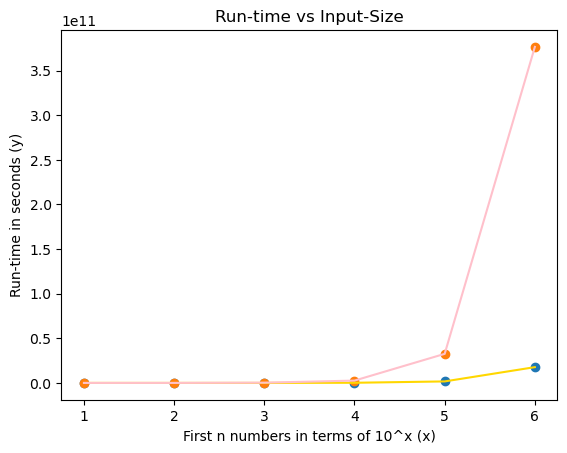

In [52]:
# Plotting graph of run-time in regular approach (pink) and optimized approach (gold)
import matplotlib.pyplot as plt

plt.title("Run-time vs Input-Size")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xlabel("First n numbers in terms of 10^x (x)")
plt.ylabel("Run-time in seconds (y)")
# plt.ylim(0, max(times) + 1)
plt.yscale("linear")
# plt.ylim(top=max(times)*2)
plt.scatter(range(1, len(n_inputs) + 1), times_optimized)
plt.plot(range(1, len(n_inputs) + 1), times_optimized, "gold")
plt.scatter(range(1, len(n_inputs) + 1), times_regular)
plt.plot(range(1, len(n_inputs) + 1), times_regular, "pink")
plt.show()

In [53]:
# Tabulation of run-time in each approach

print("===== Time took in regular approach ====")
print(", ".join([str(n_input) for n_input in n_inputs]))

print("SNo.\tRun-time")
for i, time in enumerate(times_regular):
    print(f"{i + 1}:\t{time} ns")


print("\n===== Time took in optimized approach ====")
print(", ".join([str(n_input) for n_input in n_inputs]))

print("SNo.\tRun-time")
for i, time in enumerate(times_optimized):
    print(f"{i + 1}:\t{time} ns")

===== Time took in regular approach ====
100, 1000, 10000, 100000, 1000000, 10000000
SNo.	Run-time
1:	998900 ns
2:	18064800 ns
3:	278570800 ns
4:	2609681200 ns
5:	32581796700 ns
6:	376597244400 ns

===== Time took in optimized approach ====
100, 1000, 10000, 100000, 1000000, 10000000
SNo.	Run-time
1:	1000600 ns
2:	2999000 ns
3:	18997600 ns
4:	164536700 ns
5:	1686863900 ns
6:	17686559900 ns


Space Complexity: $O(N)$

Time Complexity: Collatz Hypothesis is an unsolved mathematics problem and there is no established method to determine the number of recursive calls for a given 'n'. So the time complexity cannot be determined as a function of the number 'n'.

Memoization by saving the previous results helps us in significantly reducing the run-time as indicated in the plot above for large values.

Best Case time complexity is $Ω(log(N))$ where N is a whole-number power of 2. (E.g. $N = 4, 8, 16,$ etc.)

In the best case the function in $log(N)$ recursive calls evaluates to $1$.

The above plot helps in analyzing the run-time in proving the hypothesis for the collection of first 'n' numbers from $n=100$ to $n=10,000,000$.